In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
#Reading the data set
df = pd.read_csv("data.csv")

#Spliting the data set
data_train, data_test = train_test_split(df, test_size=0.2)

In [2]:
data_train.to_csv('data_train.csv',index=False)
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
995,996,50,RL,51.0,4712,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2006,WD,Abnorml,121600
1039,1040,180,RM,21.0,1477,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,80000
1234,1235,70,RH,55.0,8525,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Abnorml,130000
1370,1371,50,RL,90.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,105000
582,583,90,RL,81.0,11841,Grvl,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,118500


In [3]:
data_test.to_csv('data_test.csv',index=False)
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
298,299,60,RL,90.0,11700,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,175000
1154,1155,60,RL,NaN,13700,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2008,WD,Normal,201800
827,828,20,RL,65.0,8529,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,189000
469,470,60,RL,76.0,9291,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,187000


In [4]:
dftrain = pd.read_csv("data_train.csv")

In [5]:
dftest = pd.read_csv("data_test.csv")

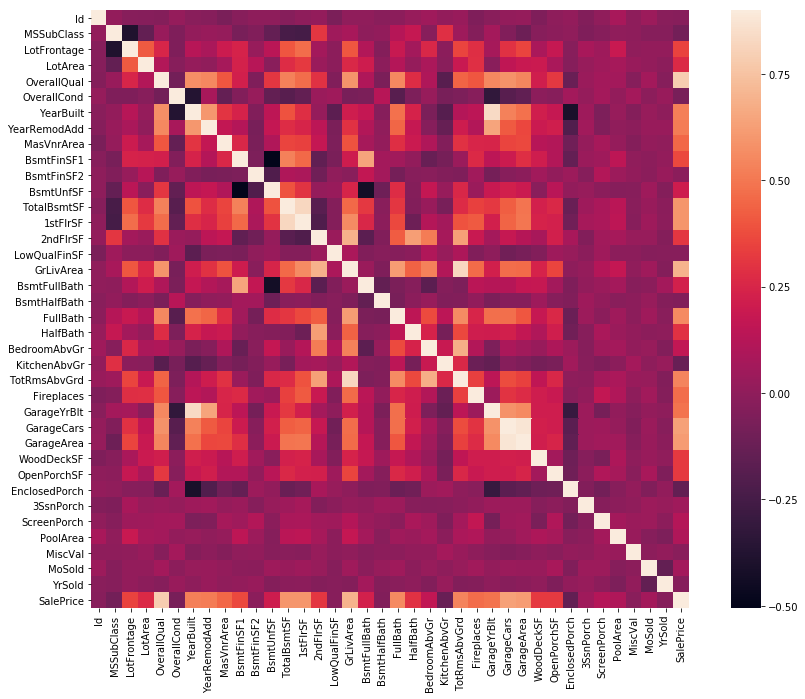

In [6]:
#heatmap of correlation matrix of the train data-set
corr_matrix = dftrain.corr()
plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, vmax=0.9, square=True)

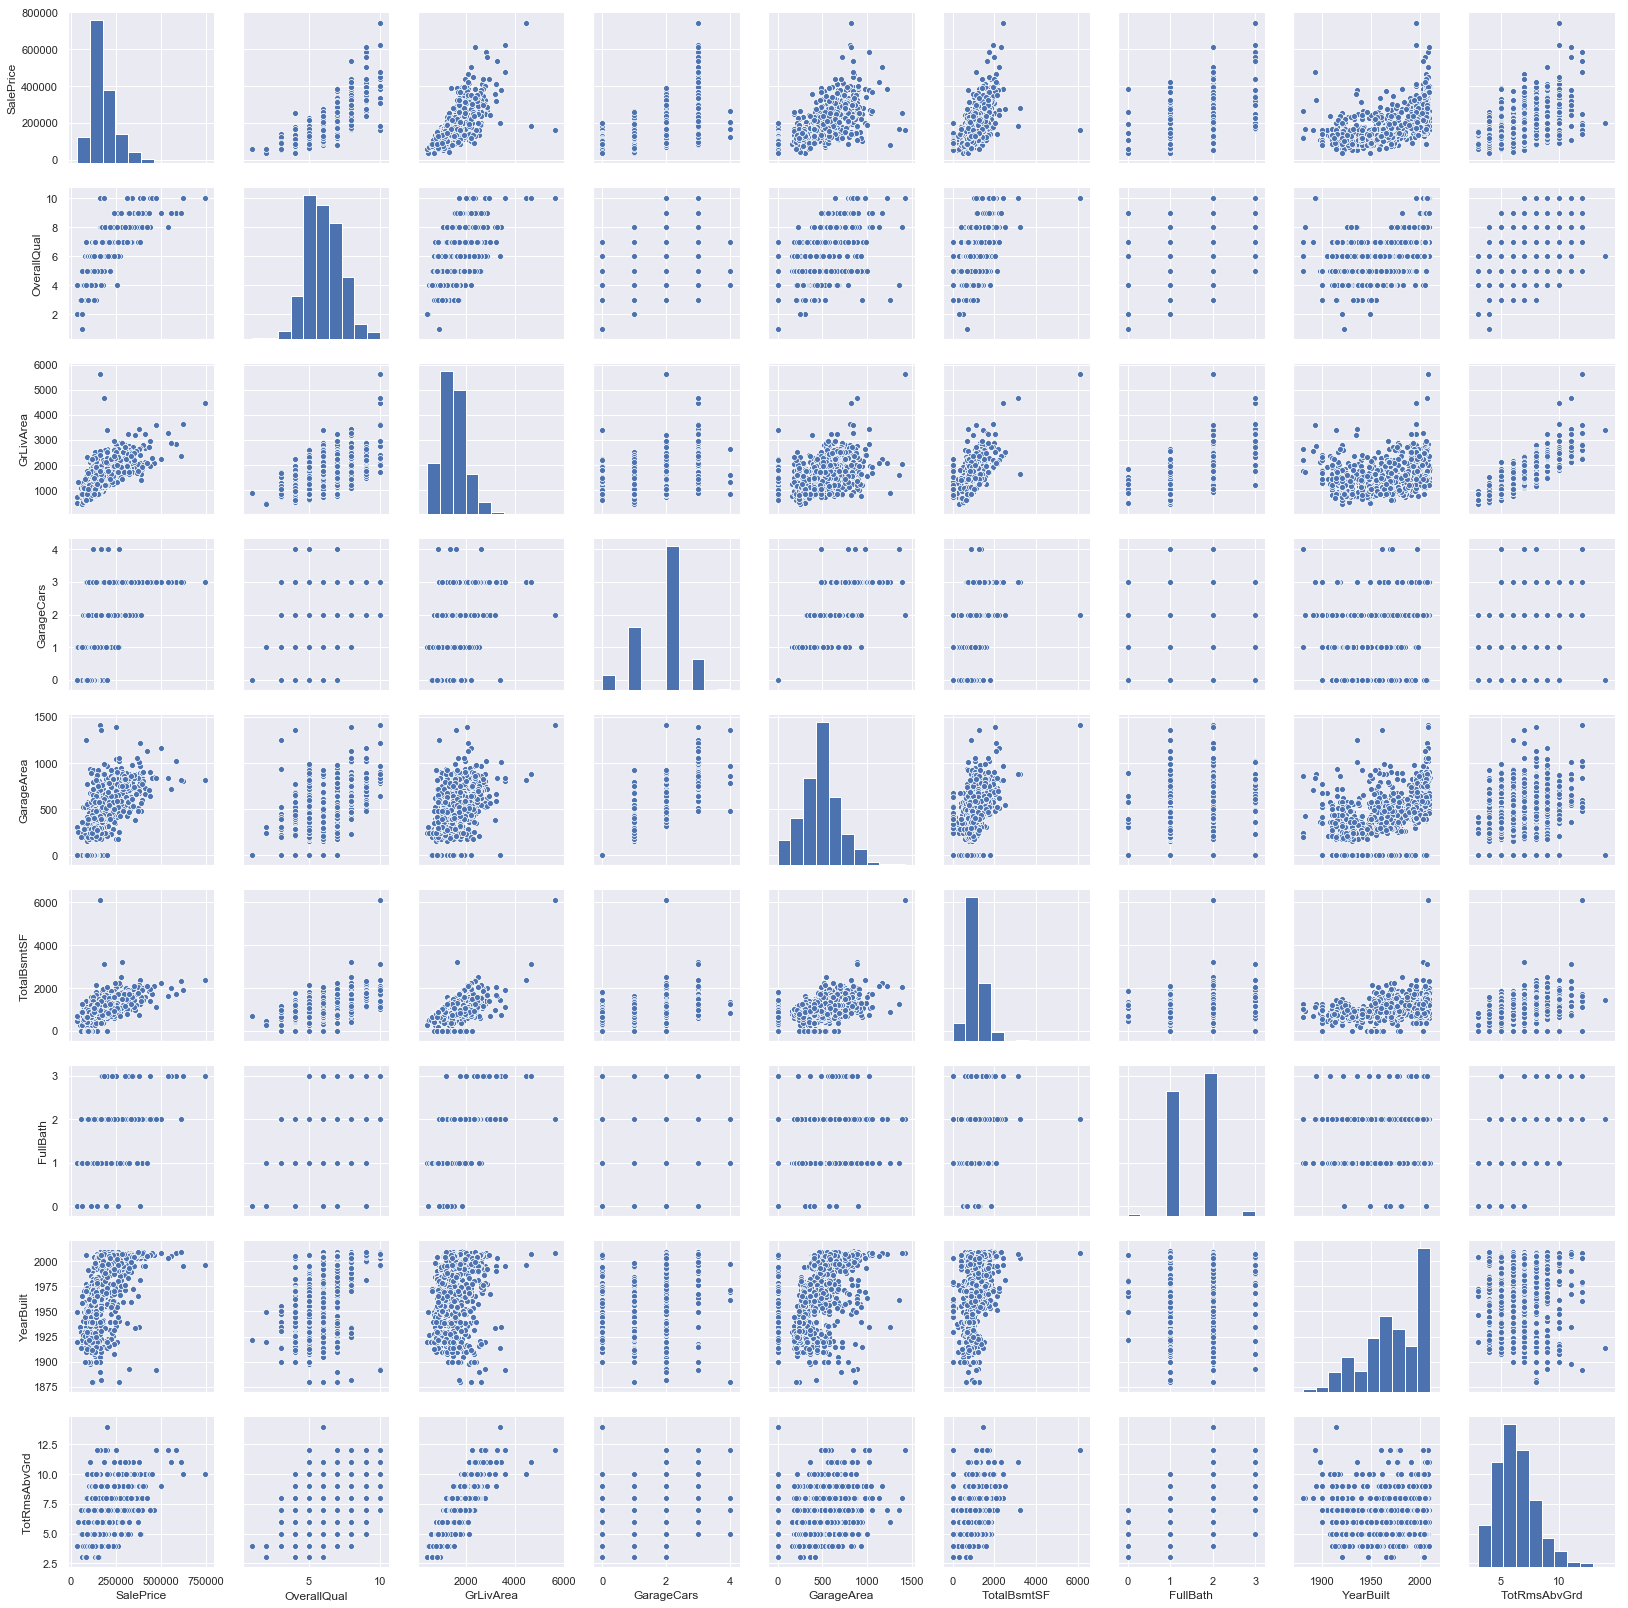

In [7]:
#scatterplot for selected columns (defined in cols)
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea' ,'TotalBsmtSF', 'FullBath', 'YearBuilt','TotRmsAbvGrd']
sns.pairplot(dftrain[cols], height = 2.5)
plt.show();

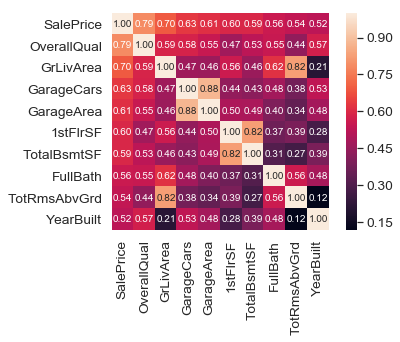

In [8]:
#heatmap of saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dftrain[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Before')

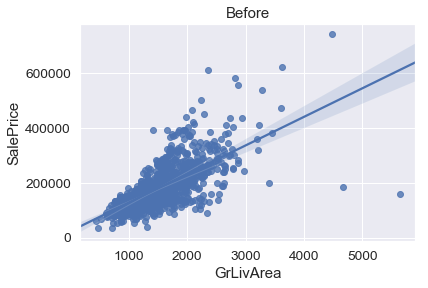

In [9]:
#Looking for outliers in 'GrLivArea' through scatter plot with linear regression line
sns.regplot('GrLivArea', 'SalePrice', data=dftrain)
plt.title('Before')

In [10]:
#Taking away the two outlires around 4,600 and 5,600 Square feet in the ‘Before’ plot
dftrain = dftrain.drop(dftrain[(dftrain['GrLivArea']>4000) & (dftrain['SalePrice']<300000)].index)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'After')

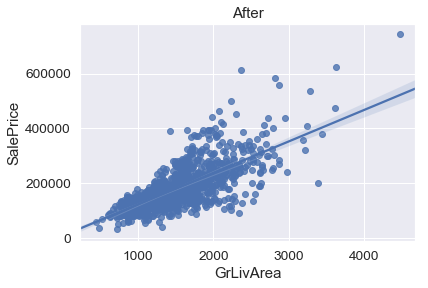

In [11]:
#Adjusted 'GrLivArea' scatter plot with linear regression line
sns.regplot('GrLivArea', 'SalePrice', data=dftrain)
plt.title('After')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Before')

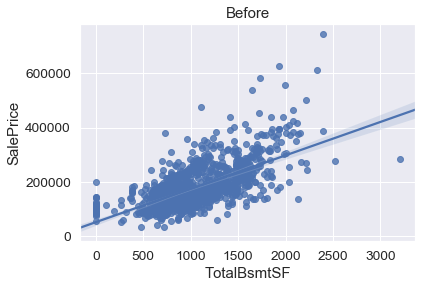

In [12]:
#Looking for outliers in 'TotalBsmtSF' through scatter plot with linear regression line
sns.regplot('TotalBsmtSF', 'SalePrice', data=dftrain)
plt.title('Before')

In [13]:
#Taking away the three outlires above 3000 Square feet in the ‘Before’ plot
dftrain = dftrain.drop(dftrain[(dftrain['TotalBsmtSF']>3000)].index)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'After')

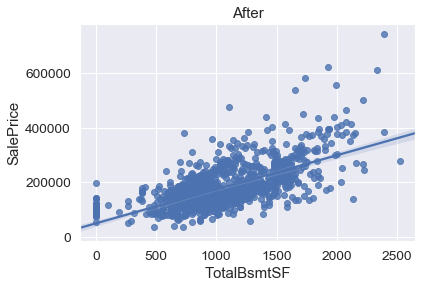

In [14]:
#Adjusted 'TotalBsmtSF' scatter plot with linear regression line
sns.regplot('TotalBsmtSF', 'SalePrice', data=dftrain)
plt.title('After')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Before')

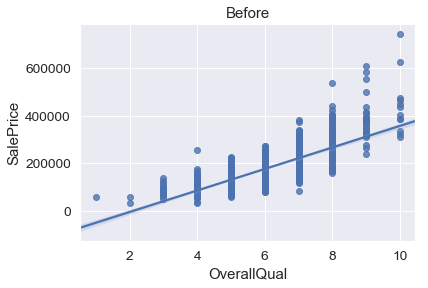

In [15]:
#Looking for outliers in 'OverallQual' through scatter plot with linear regression line
sns.regplot('OverallQual', 'SalePrice', data=dftrain)
plt.title('Before')

In [16]:
#Taking away the two outlires above 700000 USD and with a score highher than 9 in the ‘Before’ plot
dftrain = dftrain.drop(dftrain[(dftrain['SalePrice']>700000)&(dftrain['OverallQual']>9)].index)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'After')

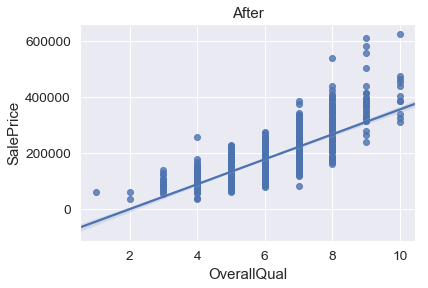

In [17]:
#Adjusted 'OverallQual' scatter plot with linear regression line
sns.regplot('OverallQual', 'SalePrice', data=dftrain)
plt.title('After')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


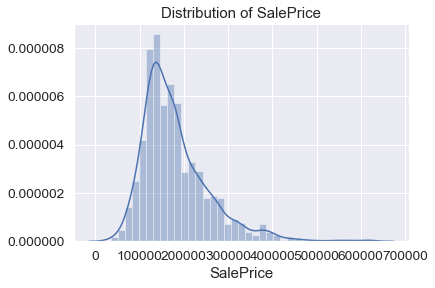

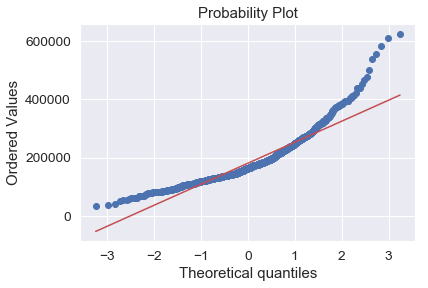

In [18]:
#distribution plot- histogram
sns.distplot(dftrain['SalePrice']).set_title("Distribution of SalePrice")

# probability plot
fig = plt.figure()
res = stats.probplot(dftrain['SalePrice'], plot=plt)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mean = 12.02 and std dev = 0.39



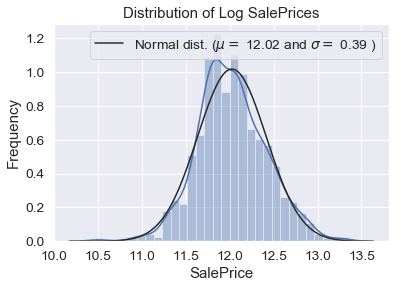

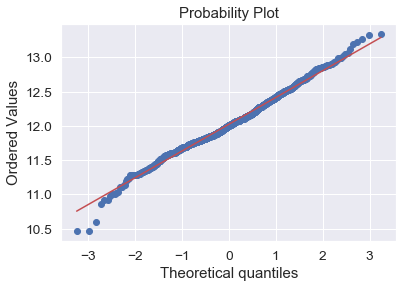

In [19]:
#Using the log1p function applies log(1+x) to all elements of the column
dftrain["SalePrice"] = np.log1p(dftrain["SalePrice"])

#Check the new distribution after log transformation 
sns.distplot(dftrain['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dftrain['SalePrice'])
print( '\n mean = {:.2f} and std dev = {:.2f}\n'.format(mu, sigma))

#NPlotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Log SalePrices')

#Also the QQ plot
fig = plt.figure()
res = stats.probplot(dftrain['SalePrice'], plot=plt)
plt.show()

In [20]:
#Distribution of missing values in train and test data sets
NAs = pd.concat([dftrain.isnull().sum(), dftest.isnull().sum()], axis=1, keys=['Train', 'Test'])
NAs[NAs.sum(axis=1) > 0]

,Train,Test
LotFrontage,206,53
Alley,1093,272
MasVnrType,7,1
MasVnrArea,7,1
BsmtQual,28,9
BsmtCond,28,9
BsmtExposure,29,9
BsmtFinType1,28,9
BsmtFinType2,28,9
Electrical,1,0


In [21]:
#Storing the unique ids of training dataset
train_ids = dftrain.index    
#Storing the unique ids of test dataset
test_ids = dftest.index

#Combining train and test datas in to one dataframe
total_df = pd.concat([dftrain,dftest]).reset_index(drop=True)

#also get missing values in total_df
print("Shape of total_df : {}".format(total_df.shape))
total_df.isnull().sum()

Shape of total_df : (1456, 81)


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1365
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [22]:
#Finding missing values as percentage of data length
total_na = (total_df.isnull().sum() / len(total_df)) * 100
total_na = total_na.drop(total_na[total_na == 0].index).sort_values(ascending=False)[:30]
missing_data_perc = pd.DataFrame({'Missing Ratio' :total_na})
missing_data_perc

,Missing Ratio
PoolQC,99.656593
MiscFeature,96.291209
Alley,93.750000
Fence,80.769231
FireplaceQu,47.390110
LotFrontage,17.788462
GarageYrBlt,5.563187
GarageType,5.563187
GarageFinish,5.563187
GarageQual,5.563187


In [23]:
#Finding unique values
print ('Unique values are:', dftrain.MiscFeature.unique())
data = dftrain.select_dtypes(include=[np.number]).interpolate().dropna()

Unique values are: [nan 'Shed' 'Othr' 'Gar2' 'TenC']


In [24]:
#Checking for 0 null values on every column 
print (sum(data.isnull().sum())) # Si el resultado es cero entonces no hay ningun valor que sea 0

0


In [25]:
#Examining categorical variables
categoricals = dftrain.select_dtypes(exclude=[np.number])
categoricals.describe() # Lo usamos ver de un vistazo los nombres de las variables que cambiaremos por 0 y 1.

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1164,1164,71,1164,1164,1164,1164,1164,1164,1164,...,1095,1095,1095,1095,1164,4,223,41,1164,1164
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,2,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,917,1159,41,734,1049,1163,834,1101,181,999,...,692,476,1042,1055,1076,2,121,36,1014,958


In [26]:
dftrain['enc_street'] = pd.get_dummies(dftrain.Street, drop_first=True)
dftest['enc_street'] = pd.get_dummies(dftrain.Street, drop_first=True)

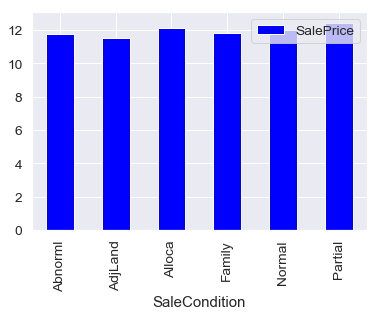

In [27]:
#Examining SaleCondition's correlation
condition_pivot=dftrain.pivot_table(index='SaleCondition',values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind = 'bar',color = 'blue')
plt.show()

In [28]:
#Encoding of the variable SaleCondition
def encode(x): return 1 if x == 'Partial' else 0
dftrain['enc_condition'] = dftrain.SaleCondition.apply(encode)
dftest['enc_condition'] = dftest.SaleCondition.apply(encode)

['IR1' 'Reg' 'IR2' 'IR3']


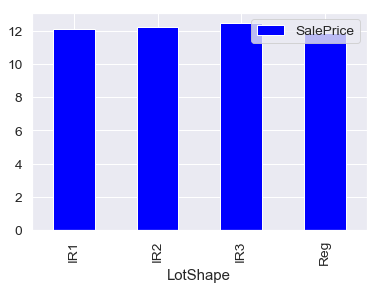

In [29]:
#Hot encoding of the variable LotShape
print (dftrain.LotShape.unique())
pt = dftrain.pivot_table(index='LotShape',values='SalePrice',aggfunc=np.median)
pt.plot(kind='bar',color='blue')
plt.show()
LotShape_D=pd.get_dummies(dftrain.LotShape)
dftrain=pd.concat([dftrain,LotShape_D],axis=1)
dftest=pd.concat([dftest,LotShape_D],axis=1)

In [30]:
#Spliting the dependent variable (Y) and the independent variable (X)
y = np.log(dftrain.SalePrice)
x = data.drop(['SalePrice','Id'], axis=1)

In [31]:
#Creating training set and hold-out set.
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)

In [32]:
#Linear regression modeling
lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [33]:
#Checking the R² score
print ('R² is: \n', model.score(X_test,y_test))

R² is: 
 0.8772916509090579


In [34]:
#Returning a list of predicted values
predictions = model.predict(X_test) # Devuelve una lista de predicciones dado un conjunto de predictores

RMSE is: 
 0.00013204853953437617


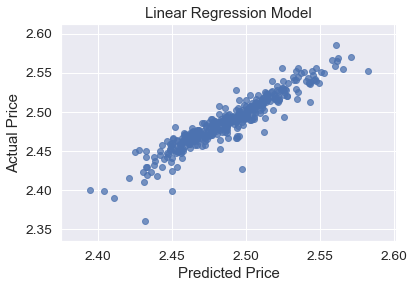

In [38]:
#RMSE, and linear regression plot of Predicted Price vs Actual Price
tolerance = (mean_squared_error(y_test, predictions))
print ('RMSE is: \n', tolerance)
realPrice = y_test
plt.scatter(predictions, actual_values, alpha=.75, color='b') 
plt.xlabel('Predicted Price') 
plt.ylabel('Actual Price')
plt.title('Linear Regression Model') 
plt.show()

In [39]:
predictedPrice = np.exp(predictions)
print ('Original predictions: \n',predictions[:5],' \n')
print ('Predicted price: \n', predictedPrice[:5])

Original predictions: 
 [2.4644714  2.52787157 2.48142678 2.4584467  2.4963662 ]  

Predicted price: 
 [11.75726559 12.52681524 11.95831418 11.68664458 12.13830554]


In [48]:
predictions

array([2.4644714 , 2.52787157, 2.48142678, 2.4584467 , 2.4963662 ,
       2.48738004, 2.53705451, 2.54210761, 2.52244936, 2.43097405,
       2.48211751, 2.49315236, 2.49678078, 2.50951484, 2.56198581,
       2.51164635, 2.45727836, 2.43790814, 2.49285254, 2.54646593,
       2.45844665, 2.46862901, 2.45569832, 2.46995003, 2.47533104,
       2.46991499, 2.48747212, 2.48314223, 2.51940083, 2.49980583,
       2.48543984, 2.49101341, 2.44816828, 2.4647574 , 2.54313631,
       2.48798861, 2.50456545, 2.48645706, 2.52176932, 2.45195581,
       2.47750401, 2.54213785, 2.49028289, 2.4416996 , 2.53394781,
       2.45747679, 2.50804672, 2.50274505, 2.48695996, 2.52456093,
       2.44321696, 2.51072677, 2.46567088, 2.53156915, 2.50489987,
       2.43764379, 2.4538638 , 2.48422989, 2.50256727, 2.4616395 ,
       2.50368101, 2.550786  , 2.46550075, 2.46393887, 2.51091059,
       2.47042541, 2.49076445, 2.46481762, 2.45297978, 2.512161  ,
       2.54726193, 2.49138184, 2.52483183, 2.54282386, 2.48207

In [50]:
predictedPrice

array([11.75726559, 12.52681524, 11.95831418, 11.68664458, 12.13830554,
       12.02971738, 12.64237812, 12.70642299, 12.4590761 , 11.36995155,
       11.96657701, 12.0993576 , 12.14333895, 12.29896168, 12.96153094,
       12.32520492, 11.67299861, 11.44906588, 12.09573053, 12.76192248,
       11.68664404, 11.80624945, 11.65456933, 11.8218561 , 11.88564104,
       11.82144187, 12.03082515, 11.97884561, 12.42115206, 12.18012871,
       12.00640003, 12.07350539, 11.56713952, 11.76062864, 12.71950076,
       12.03704062, 12.23823968, 12.01861929, 12.45060629, 11.61103353,
       11.91149631, 12.70680715, 12.06468856, 11.49255692, 12.60316296,
       11.67531508, 12.28091859, 12.21598145, 12.02466509, 12.48541207,
       11.51000851, 12.3138762 , 11.77137667, 12.57321997, 12.24233305,
       11.44603973, 11.63320836, 11.99188165, 12.21380991, 11.72401729,
       12.22742051, 12.81717416, 11.76937414, 11.7510062 , 12.31613995,
       11.82747727, 12.07049989, 11.76133693, 11.62292899, 12.33